In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import hamming_loss
import tensorflow as tf
from feature_extractor import fingerprint_features

from classifiers.model1 import FeatureExtractedClassifier
from classifiers.model2 import SmilePredictor
from get_data import fetch_single_label_data, fetch_multi_label_data
from utils import plot_cm, plot_metrics

# Model 1

In [4]:
def preprocess_smile(s):
    s = str(s)
    extracted_features = np.array(fingerprint_features(s, size=2048))
    extracted_features = extracted_features.reshape(1, -1)
    return extracted_features

In [5]:
# we use class weight since the data is imbalanced
# the following class weights is calculated in the data_exploration file
class_weight = {0: 2.81, 1: 0.61}
print(f"class weights: {class_weight}")

METRICS = [
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    tf.keras.metrics.AUC(name='auc')
]

class weights: {0: 2.81, 1: 0.61}


In [6]:
X_train, X_test, y_train, y_test = fetch_single_label_data(
    get_extracted_features=True)

In [7]:
clf = FeatureExtractedClassifier(epochs=100,
                                 batch_size=16,
                                 metrics=METRICS,
                                 optimizer=tf.keras.optimizers.Adam(lr=1e-5),
                                 class_weight=class_weight,
                                 verbose=2
                                 )

In [8]:
clf.fit(X_train, y_train)

Train on 3199 samples, validate on 800 samples
Epoch 1/100
3199/3199 - 4s - loss: 1.1490 - accuracy: 0.4720 - precision: 0.4720 - recall: 0.4720 - auc: 0.4752 - val_loss: 0.6944 - val_accuracy: 0.3887 - val_precision: 0.3887 - val_recall: 0.3887 - val_auc: 0.3423
Epoch 2/100
3199/3199 - 1s - loss: 1.1119 - accuracy: 0.4945 - precision: 0.4945 - recall: 0.4945 - auc: 0.4957 - val_loss: 0.7188 - val_accuracy: 0.3363 - val_precision: 0.3363 - val_recall: 0.3363 - val_auc: 0.2882
Epoch 3/100
3199/3199 - 1s - loss: 1.1020 - accuracy: 0.4945 - precision: 0.4945 - recall: 0.4945 - auc: 0.4980 - val_loss: 0.7589 - val_accuracy: 0.3212 - val_precision: 0.3212 - val_recall: 0.3212 - val_auc: 0.2740
Epoch 4/100
3199/3199 - 1s - loss: 1.0344 - accuracy: 0.4751 - precision: 0.4751 - recall: 0.4751 - auc: 0.4889 - val_loss: 0.7767 - val_accuracy: 0.3125 - val_precision: 0.3125 - val_recall: 0.3125 - val_auc: 0.2644
Epoch 5/100
3199/3199 - 1s - loss: 0.9850 - accuracy: 0.4776 - precision: 0.4776 - re

Epoch 39/100
3199/3199 - 1s - loss: 0.6924 - accuracy: 0.5430 - precision: 0.5430 - recall: 0.5430 - auc: 0.5723 - val_loss: 0.6710 - val_accuracy: 0.4375 - val_precision: 0.4375 - val_recall: 0.4375 - val_auc: 0.4179
Epoch 40/100
3199/3199 - 1s - loss: 0.7057 - accuracy: 0.5377 - precision: 0.5377 - recall: 0.5377 - auc: 0.5719 - val_loss: 0.6668 - val_accuracy: 0.4700 - val_precision: 0.4700 - val_recall: 0.4700 - val_auc: 0.4513
Epoch 41/100
3199/3199 - 1s - loss: 0.6846 - accuracy: 0.5586 - precision: 0.5586 - recall: 0.5586 - auc: 0.5900 - val_loss: 0.6672 - val_accuracy: 0.4650 - val_precision: 0.4650 - val_recall: 0.4650 - val_auc: 0.4432
Epoch 42/100
3199/3199 - 1s - loss: 0.6629 - accuracy: 0.5708 - precision: 0.5708 - recall: 0.5708 - auc: 0.6086 - val_loss: 0.6669 - val_accuracy: 0.4588 - val_precision: 0.4588 - val_recall: 0.4588 - val_auc: 0.4424
Epoch 43/100
3199/3199 - 1s - loss: 0.6885 - accuracy: 0.5617 - precision: 0.5617 - recall: 0.5617 - auc: 0.5932 - val_loss: 0.6

Epoch 77/100
3199/3199 - 1s - loss: 0.5695 - accuracy: 0.6565 - precision: 0.6565 - recall: 0.6565 - auc: 0.7091 - val_loss: 0.6492 - val_accuracy: 0.5788 - val_precision: 0.5788 - val_recall: 0.5788 - val_auc: 0.6090
Epoch 78/100
3199/3199 - 1s - loss: 0.5559 - accuracy: 0.6777 - precision: 0.6777 - recall: 0.6777 - auc: 0.7309 - val_loss: 0.6490 - val_accuracy: 0.5825 - val_precision: 0.5825 - val_recall: 0.5825 - val_auc: 0.6171
Epoch 79/100
3199/3199 - 1s - loss: 0.5563 - accuracy: 0.6655 - precision: 0.6655 - recall: 0.6655 - auc: 0.7202 - val_loss: 0.6502 - val_accuracy: 0.5838 - val_precision: 0.5838 - val_recall: 0.5838 - val_auc: 0.6151
Epoch 80/100
3199/3199 - 1s - loss: 0.5510 - accuracy: 0.6780 - precision: 0.6780 - recall: 0.6780 - auc: 0.7345 - val_loss: 0.6493 - val_accuracy: 0.5925 - val_precision: 0.5925 - val_recall: 0.5925 - val_auc: 0.6255
Epoch 81/100
3199/3199 - 1s - loss: 0.5498 - accuracy: 0.6693 - precision: 0.6693 - recall: 0.6693 - auc: 0.7311 - val_loss: 0.6

FeatureExtractedClassifier(activation='relu', batch_size=16,
                           class_weight={0: 2.81, 1: 0.61}, epochs=100,
                           is_multi_label=False,
                           loss='categorical_crossentropy',
                           metrics=[<tensorflow.python.keras.metrics.BinaryAccuracy object at 0x000002076795C940>,
                           optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x000002076795C898>,
                           output_activation='softmax', validation_split=0.2)

loss : 0.6294
accuracy : 0.6760
precision : 0.6760
recall : 0.6760
auc : 0.7185


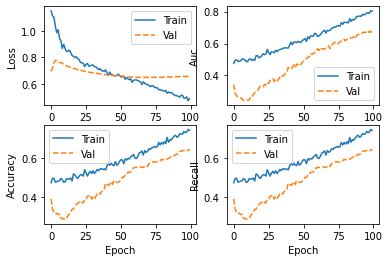

In [9]:
# Evaluation

plot_metrics(clf.history)

results = clf.history.model.evaluate(X_test, y_test, verbose=0)
for name, value in zip(clf.history.model.metrics_names, results):
    print(f"{name} : {value:.4f}")





              precision    recall  f1-score   support

           0       0.27      0.49      0.35       178
           1       0.87      0.72      0.78       822

    accuracy                           0.68      1000
   macro avg       0.57      0.60      0.57      1000
weighted avg       0.76      0.68      0.71      1000



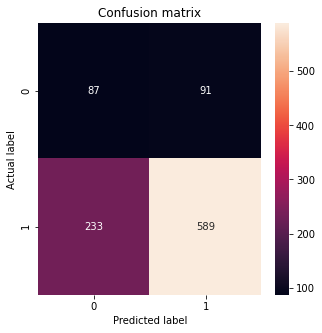

In [10]:
test_pred = clf.predict(X_test)
plot_cm(y_test, test_pred)
plt.show()

# Model2

In [11]:
X_train, X_test, y_train, y_test = fetch_single_label_data(
    get_extracted_features=False)

In [12]:
clf2 = SmilePredictor(epochs=150,
                      batch_size=16,
                      loss='binary_crossentropy',
                      optimizer=tf.keras.optimizers.SGD(learning_rate=0.001,
                                                        momentum=0.0,
                                                        nesterov=False),
                      metrics=METRICS,
                      class_weight=class_weight,
                      validation_split=0.2,
                      verbose=3
                      )

In [13]:
clf2.fit(X_train, y_train)

Train on 3199 samples, validate on 800 samples
Epoch 1/150
3199/3199 - 4s - loss: 0.6938 - accuracy: 0.4070 - precision: 0.8717 - recall: 0.3239 - auc: 0.5659 - val_loss: 0.6746 - val_accuracy: 0.4712 - val_precision: 0.8805 - val_recall: 0.4211 - val_auc: 0.5953
Epoch 2/150
3199/3199 - 2s - loss: 0.6928 - accuracy: 0.4839 - precision: 0.8577 - recall: 0.4437 - auc: 0.5701 - val_loss: 0.6718 - val_accuracy: 0.5288 - val_precision: 0.8830 - val_recall: 0.4992 - val_auc: 0.6017
Epoch 3/150
3199/3199 - 2s - loss: 0.6913 - accuracy: 0.4952 - precision: 0.8619 - recall: 0.4571 - auc: 0.5777 - val_loss: 0.6701 - val_accuracy: 0.5763 - val_precision: 0.8671 - val_recall: 0.5789 - val_auc: 0.6029
Epoch 4/150
3199/3199 - 2s - loss: 0.6916 - accuracy: 0.5286 - precision: 0.8574 - recall: 0.5093 - auc: 0.5747 - val_loss: 0.6697 - val_accuracy: 0.5387 - val_precision: 0.8776 - val_recall: 0.5173 - val_auc: 0.6041
Epoch 5/150
3199/3199 - 2s - loss: 0.6918 - accuracy: 0.5167 - precision: 0.8543 - re

Epoch 39/150
3199/3199 - 2s - loss: 0.6801 - accuracy: 0.5655 - precision: 0.8765 - recall: 0.5467 - auc: 0.6275 - val_loss: 0.6568 - val_accuracy: 0.6000 - val_precision: 0.8929 - val_recall: 0.5895 - val_auc: 0.6554
Epoch 40/150
3199/3199 - 2s - loss: 0.6797 - accuracy: 0.5711 - precision: 0.8724 - recall: 0.5582 - auc: 0.6256 - val_loss: 0.6563 - val_accuracy: 0.6175 - val_precision: 0.8928 - val_recall: 0.6135 - val_auc: 0.6573
Epoch 41/150
3199/3199 - 2s - loss: 0.6799 - accuracy: 0.5814 - precision: 0.8744 - recall: 0.5712 - auc: 0.6252 - val_loss: 0.6562 - val_accuracy: 0.6025 - val_precision: 0.8952 - val_recall: 0.5910 - val_auc: 0.6579
Epoch 42/150
3199/3199 - 2s - loss: 0.6789 - accuracy: 0.5633 - precision: 0.8682 - recall: 0.5506 - auc: 0.6275 - val_loss: 0.6564 - val_accuracy: 0.5863 - val_precision: 0.8957 - val_recall: 0.5684 - val_auc: 0.6599
Epoch 43/150
3199/3199 - 2s - loss: 0.6803 - accuracy: 0.5821 - precision: 0.8690 - recall: 0.5769 - auc: 0.6249 - val_loss: 0.6

Epoch 77/150
3199/3199 - 2s - loss: 0.6732 - accuracy: 0.6111 - precision: 0.8732 - recall: 0.6147 - auc: 0.6442 - val_loss: 0.6490 - val_accuracy: 0.5900 - val_precision: 0.8983 - val_recall: 0.5714 - val_auc: 0.6799
Epoch 78/150
3199/3199 - 2s - loss: 0.6722 - accuracy: 0.5852 - precision: 0.8824 - recall: 0.5696 - auc: 0.6487 - val_loss: 0.6481 - val_accuracy: 0.6150 - val_precision: 0.8993 - val_recall: 0.6045 - val_auc: 0.6807
Epoch 79/150
3199/3199 - 2s - loss: 0.6714 - accuracy: 0.5814 - precision: 0.8757 - recall: 0.5700 - auc: 0.6519 - val_loss: 0.6481 - val_accuracy: 0.6112 - val_precision: 0.9005 - val_recall: 0.5985 - val_auc: 0.6815
Epoch 80/150
3199/3199 - 2s - loss: 0.6716 - accuracy: 0.5896 - precision: 0.8825 - recall: 0.5757 - auc: 0.6519 - val_loss: 0.6472 - val_accuracy: 0.6400 - val_precision: 0.8952 - val_recall: 0.6421 - val_auc: 0.6810
Epoch 81/150
3199/3199 - 2s - loss: 0.6707 - accuracy: 0.6108 - precision: 0.8789 - recall: 0.6089 - auc: 0.6523 - val_loss: 0.6

Epoch 115/150
3199/3199 - 2s - loss: 0.6657 - accuracy: 0.6036 - precision: 0.8833 - recall: 0.5948 - auc: 0.6610 - val_loss: 0.6431 - val_accuracy: 0.5688 - val_precision: 0.9020 - val_recall: 0.5398 - val_auc: 0.6931
Epoch 116/150
3199/3199 - 2s - loss: 0.6620 - accuracy: 0.5833 - precision: 0.8884 - recall: 0.5620 - auc: 0.6756 - val_loss: 0.6404 - val_accuracy: 0.6837 - val_precision: 0.9039 - val_recall: 0.6932 - val_auc: 0.6922
Epoch 117/150
3199/3199 - 2s - loss: 0.6652 - accuracy: 0.6071 - precision: 0.8814 - recall: 0.6013 - auc: 0.6603 - val_loss: 0.6415 - val_accuracy: 0.6012 - val_precision: 0.8968 - val_recall: 0.5880 - val_auc: 0.6935
Epoch 118/150
3199/3199 - 2s - loss: 0.6647 - accuracy: 0.6068 - precision: 0.8883 - recall: 0.5948 - auc: 0.6658 - val_loss: 0.6406 - val_accuracy: 0.6687 - val_precision: 0.9016 - val_recall: 0.6752 - val_auc: 0.6919
Epoch 119/150
3199/3199 - 2s - loss: 0.6646 - accuracy: 0.5999 - precision: 0.8786 - recall: 0.5937 - auc: 0.6610 - val_loss

SmilePredictor(activation='relu', batch_size=16,
               class_weight={0: 2.81, 1: 0.61}, epochs=150,
               loss='binary_crossentropy', max_length=74,
               metrics=[<tensorflow.python.keras.metrics.BinaryAccuracy object at 0x000002076795C940>,
               optimizer=<tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x00000207710DA978>,
               validation_split=0.2)

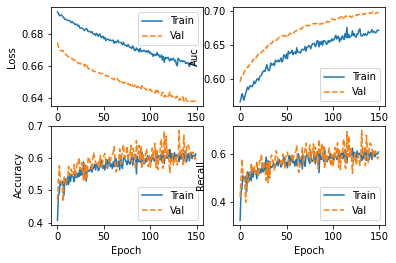

In [14]:
# Evaluation

plot_metrics(clf2.history)

              precision    recall  f1-score   support

           0       0.23      0.59      0.33       178
           1       0.86      0.57      0.68       822

    accuracy                           0.57      1000
   macro avg       0.55      0.58      0.51      1000
weighted avg       0.75      0.57      0.62      1000



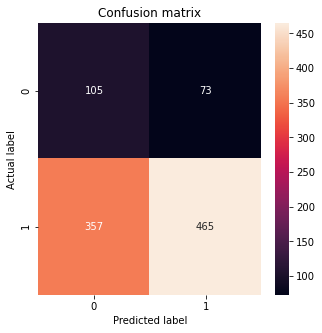

In [15]:
test_pred = clf2.predict(X_test)
plot_cm(y_test, test_pred)
plt.show()

In [16]:
# Precict 
smile = 'Cc1cccc(N2CCN(C(=O)C34CC5CC(CC(C5)C3)C4)CC2)c1C'
print(f"smile property prediction: P1={clf2.predict(smile)}")

smile property prediction: P1=[[1]]


# Model3

In [19]:
X_train, X_test, y_train, y_test = fetch_multi_label_data(
    get_extracted_features=True)

#### We should claculate  class_weight for all the P1, P2, ..., P9 and pass it to the model to get better results. 

In [20]:
clf3 = FeatureExtractedClassifier(epochs=100,
                                 batch_size=16,
                                 metrics=METRICS,
                                 loss='binary_crossentropy',
                                 output_activation='sigmoid',
                                 optimizer=tf.keras.optimizers.Adam(lr=1e-5),
                                 # class_weight=class_weight,
                                 is_multi_label=True
                                 )

In [21]:
clf3.fit(X_train, y_train)

Train on 3199 samples, validate on 800 samples
Epoch 1/100
3199/3199 - 3s - loss: 0.8889 - accuracy: 0.4940 - precision: 0.8320 - recall: 0.4940 - auc: 0.4871 - val_loss: 0.6961 - val_accuracy: 0.4935 - val_precision: 0.8294 - val_recall: 0.4930 - val_auc: 0.4912
Epoch 2/100
3199/3199 - 1s - loss: 0.8628 - accuracy: 0.4985 - precision: 0.8349 - recall: 0.4981 - auc: 0.5018 - val_loss: 0.7128 - val_accuracy: 0.4832 - val_precision: 0.8299 - val_recall: 0.4770 - val_auc: 0.4924
Epoch 3/100
3199/3199 - 1s - loss: 0.8413 - accuracy: 0.5001 - precision: 0.8367 - recall: 0.4989 - auc: 0.5020 - val_loss: 0.7312 - val_accuracy: 0.4818 - val_precision: 0.8313 - val_recall: 0.4736 - val_auc: 0.4953
Epoch 4/100
3199/3199 - 1s - loss: 0.8292 - accuracy: 0.4988 - precision: 0.8331 - recall: 0.5001 - auc: 0.4976 - val_loss: 0.7313 - val_accuracy: 0.4860 - val_precision: 0.8347 - val_recall: 0.4770 - val_auc: 0.4970
Epoch 5/100
3199/3199 - 1s - loss: 0.8129 - accuracy: 0.5003 - precision: 0.8334 - re

Epoch 39/100
3199/3199 - 1s - loss: 0.6714 - accuracy: 0.6383 - precision: 0.8403 - recall: 0.6999 - auc: 0.5183 - val_loss: 0.6557 - val_accuracy: 0.6874 - val_precision: 0.8340 - val_recall: 0.7796 - val_auc: 0.5085
Epoch 40/100
3199/3199 - 1s - loss: 0.6706 - accuracy: 0.6375 - precision: 0.8393 - recall: 0.7000 - auc: 0.5141 - val_loss: 0.6552 - val_accuracy: 0.6899 - val_precision: 0.8349 - val_recall: 0.7821 - val_auc: 0.5100
Epoch 41/100
3199/3199 - 1s - loss: 0.6680 - accuracy: 0.6430 - precision: 0.8386 - recall: 0.7090 - auc: 0.5117 - val_loss: 0.6536 - val_accuracy: 0.6950 - val_precision: 0.8350 - val_recall: 0.7896 - val_auc: 0.5095
Epoch 42/100
3199/3199 - 1s - loss: 0.6662 - accuracy: 0.6462 - precision: 0.8385 - recall: 0.7140 - auc: 0.5166 - val_loss: 0.6521 - val_accuracy: 0.7022 - val_precision: 0.8352 - val_recall: 0.8001 - val_auc: 0.5105
Epoch 43/100
3199/3199 - 1s - loss: 0.6646 - accuracy: 0.6510 - precision: 0.8413 - recall: 0.7176 - auc: 0.5191 - val_loss: 0.6

Epoch 77/100
3199/3199 - 1s - loss: 0.5958 - accuracy: 0.7523 - precision: 0.8412 - recall: 0.8672 - auc: 0.5497 - val_loss: 0.5913 - val_accuracy: 0.8162 - val_precision: 0.8346 - val_recall: 0.9718 - val_auc: 0.5328
Epoch 78/100
3199/3199 - 1s - loss: 0.5931 - accuracy: 0.7599 - precision: 0.8432 - recall: 0.8754 - auc: 0.5527 - val_loss: 0.5894 - val_accuracy: 0.8168 - val_precision: 0.8345 - val_recall: 0.9728 - val_auc: 0.5327
Epoch 79/100
3199/3199 - 1s - loss: 0.5913 - accuracy: 0.7555 - precision: 0.8408 - recall: 0.8725 - auc: 0.5488 - val_loss: 0.5868 - val_accuracy: 0.8175 - val_precision: 0.8342 - val_recall: 0.9745 - val_auc: 0.5333
Epoch 80/100
3199/3199 - 1s - loss: 0.5920 - accuracy: 0.7584 - precision: 0.8424 - recall: 0.8743 - auc: 0.5475 - val_loss: 0.5864 - val_accuracy: 0.8179 - val_precision: 0.8345 - val_recall: 0.9746 - val_auc: 0.5339
Epoch 81/100
3199/3199 - 1s - loss: 0.5882 - accuracy: 0.7608 - precision: 0.8419 - recall: 0.8785 - auc: 0.5524 - val_loss: 0.5

FeatureExtractedClassifier(activation='relu', batch_size=16, class_weight=None,
                           epochs=100, is_multi_label=True,
                           loss='binary_crossentropy',
                           metrics=[<tensorflow.python.keras.metrics.BinaryAccuracy object at 0x000002076795C940>,
                           optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x000002076A48F160>,
                           output_activation='sigmoid', validation_split=0.2)

loss : 0.5508
accuracy : 0.8301
precision : 0.8330
recall : 0.9955
auc : 0.5259


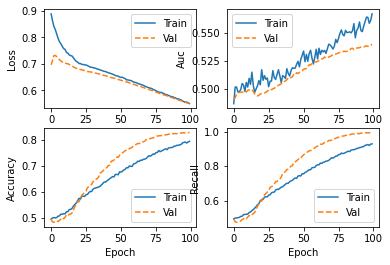

In [22]:
plot_metrics(clf3.history)

results = clf3.history.model.evaluate(X_test, y_test, verbose=0)
for name, value in zip(clf3.history.model.metrics_names, results):
    print(f"{name} : {value:.4f}")

hamming loss: 0.1699
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       822
           1       0.00      0.00      0.00       127
           2       0.00      0.00      0.00        38
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         3

    accuracy                           0.82      1000
   macro avg       0.14      0.17      0.15      1000
weighted avg       0.68      0.82      0.74      1000



C:\Users\user\miniconda3\envs\test\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


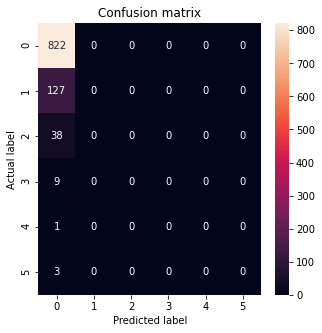

In [25]:
test_pred = clf3.predict(X_test)
hamming_loss = hamming_loss(y_test, test_pred)
print(f"hamming loss: {hamming_loss:.4f}")
plot_cm(y_test, test_pred)
plt.show()